In [166]:
import numpy as np
import time
import pickle

In [167]:
data = np.load('data/mnist.npz', 'rb')
print(data.keys())
(_, x_test), (_, x_train), (_, x_valid), (_, y_valid), (_, y_train), (_, y_test) = data.items()

['x_test', 'x_train', 'x_valid', 'y_valid', 'y_train', 'y_test']


In [168]:
lam = 0.001
class FCLayer:
    def __init__(self, shape, nonlinearity, nonlinearity_der):
        self.W = np.random.normal(0, 0.02, shape)
        self.b = np.random.normal(0, 0.02, shape[1])
        self.nonlinearity = nonlinearity
        self.nonlinearity_der = nonlinearity_der
        
    def forward(self, x):
        self.x = x
        self.r = np.dot(x, self.W) + self.b
        self.o = self.nonlinearity(self.r)
        return self.o
    
    def backward(self, delta):
        delta = np.dot(delta, self.nonlinearity_der(self.r))
        
        dB = delta
        dW = np.outer(self.x, delta)
        delta = np.dot(delta, self.W.T)

        self.W -= learning_rate * (dW + lam*self.W.mean())
        self.b -= learning_rate * dB
        
        return delta

In [169]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

def sigmoid_der(x):
    s = sigmoid(x)
    return np.diag(s * (1 - s))

def softmax(x):
    return np.exp(x)/np.exp(x).sum()

def softmax_der(x):
    p = softmax(x)
    t = np.outer(p, p)
    return np.diag(p) - t

In [170]:
def create_net():
    net = [
        FCLayer((784, 256), sigmoid, sigmoid_der),
        FCLayer((256, 128), sigmoid, sigmoid_der),
        FCLayer((128, 64), sigmoid, sigmoid_der),
        FCLayer((64, 10), softmax, softmax_der),
    ]
    return net

In [171]:
def train(net, x, y):
    o = x
    for layer in net:
        o = layer.forward(o)
    delta = np.zeros(10)
    delta[y] = -1./o[y]
    loss = -np.log(o[y])
    for layer in net[::-1]:
        delta = layer.backward(delta)
    return loss

def predict(net, x):
    o = x
    for layer in net:
        o = layer.forward(o)
    return np.argmax(o)

def accuracy(net, X, Y):
    c = 0
    for x, y in zip(X, Y):
        if predict(net, x) == y:
            c += 1
    return c/len(X)

net = create_net()

In [172]:
learning_rate = 0.1
#x_train_cut, y_train_cut = x_train[:1000], y_train[:1000]
losses = []
train_accs = []
valid_accs = []

best_valid = 0

for k in range(10):
    loss = 0
    start = time.time()
    for i, (x, y) in enumerate(zip(x_train, y_train)):
        loss += train(net, x, y)
    loss /= len(x_train)
    valid_acc = accuracy(net, x_valid, y_valid)
    train_acc = accuracy(net, x_train, y_train)
    
    losses.append(loss)
    valid_accs.append(valid_acc)
    train_accs.append(train_acc)
    if valid_acc > best_valid:
        best_valid = valid_acc
        with open('net1.pkl', 'wb') as out:
            pickle.dump(net, out)
    
    print('epoch:', k)
    print('loss:', loss)
    print('valid acc:', valid_acc)
    print('train acc:', train_acc)
    print('time:', time.time()-start)
    

epoch: 0
loss: 1.0970036661
valid acc: 0.9349
train acc: 0.9286
time: 189.3100733757019
epoch: 1
loss: 0.219187815763
valid acc: 0.9549
train acc: 0.95604
time: 188.67317152023315
epoch: 2
loss: 0.141838322296
valid acc: 0.9646
train acc: 0.96762
time: 188.16302371025085
epoch: 3
loss: 0.10898794583
valid acc: 0.9603
train acc: 0.96572
time: 187.66545820236206
epoch: 4
loss: 0.0885506503719
valid acc: 0.9655
train acc: 0.97318
time: 188.5082585811615
epoch: 5
loss: 0.072811443233
valid acc: 0.9641
train acc: 0.97516
time: 189.61774110794067


KeyboardInterrupt: 

In [165]:
start = time.time()
print(accuracy(net, x_valid, y_valid))
print(time.time() - start)

0.96
1.2019028663635254


In [163]:
with open('net.pkl', 'wb') as out:
    pickle.dump(net, out)

(2, 8)


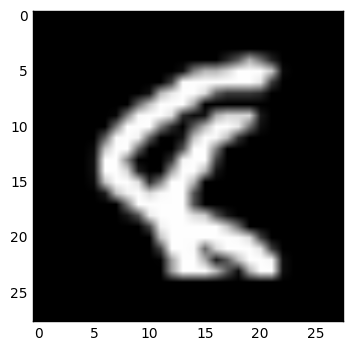

(4, 5)


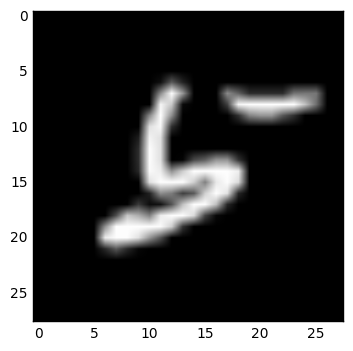

(9, 4)


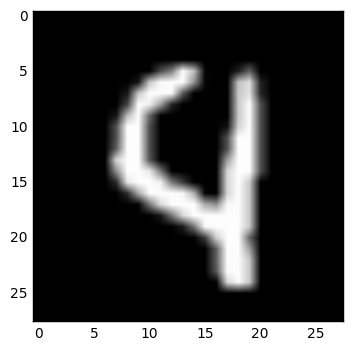

(8, 3)


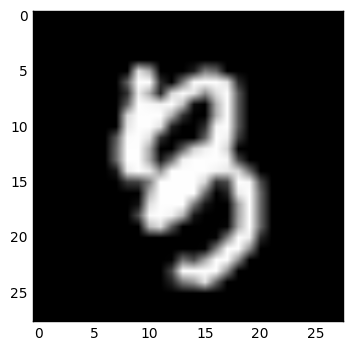

(0, 9)


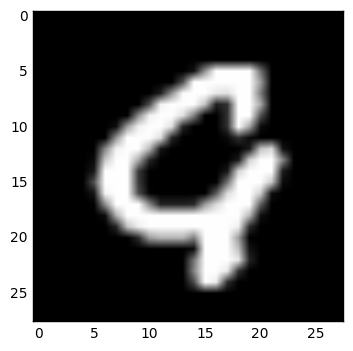

(6, 0)


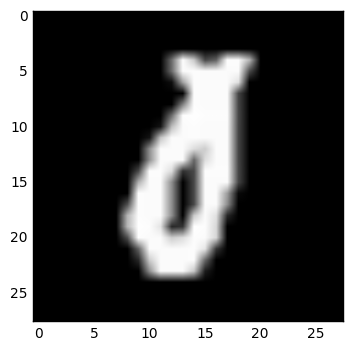

(0, 9)


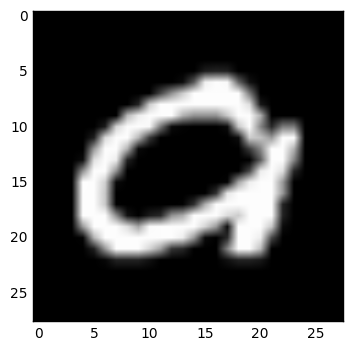

(7, 8)


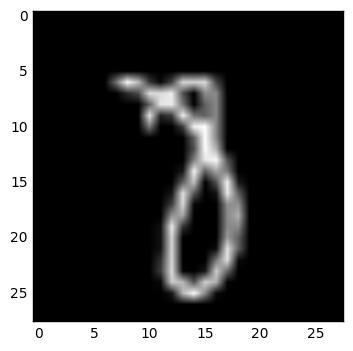

(8, 3)


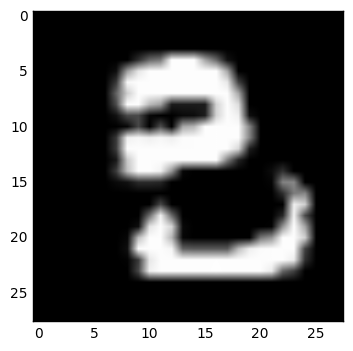

(7, 9)


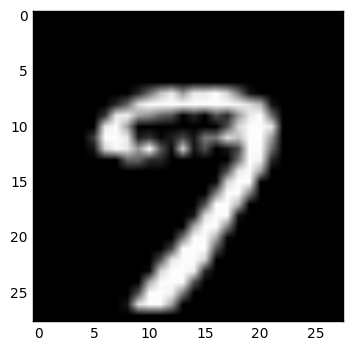

In [183]:
import matplotlib.pyplot as plt
c = 0
errors = []
pics = []
for x, y in zip(x_valid, y_valid):
    py = predict(net, x)
    if py != y:
        errors.append((py, y))
        pics.append(x)
errors[:10]
for x, err in zip(pics[:10], errors[:10]):
    x = np.uint8(x*255)
    x = x.reshape((28,28))
    print(err)
    plt.imshow(x, cmap='gray')
    plt.show()